In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import sklearn.metrics as skmet
import sklearn.ensemble as skens
import sklearn.linear_model as sklin
import sklearn.preprocessing as skprep
import sklearn.model_selection as skms
import sklearn.pipeline as skpipe

In [177]:
df=pd.read_csv("3-bank.csv",sep=";")

In [178]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [179]:
enc=skprep.LabelEncoder()
df['job']=enc.fit_transform(df['job'])
df['marital']=enc.fit_transform(df['marital'])
df['education']=enc.fit_transform(df['education'])
df['default']=enc.fit_transform(df['default'])
df['housing']=enc.fit_transform(df['housing'])
df['loan']=enc.fit_transform(df['loan'])
df['contact']=enc.fit_transform(df['contact'])
df['month']=enc.fit_transform(df['month'])
df['poutcome']=enc.fit_transform(df['poutcome'])
df['y']=enc.fit_transform(df['y'])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0


In [180]:
#display size of dataset
print("Size=",df.shape)

Size= (4521, 17)


In [181]:
#display attribute names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [182]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,4.411192,1.147755,1.231365,0.016810,1422.657819,0.566025,0.152842,0.652289,15.915284,5.540146,263.961292,2.793630,39.766645,0.542579,2.559168,0.115240
std,10.576211,3.255716,0.599650,0.748744,0.128575,3009.638142,0.495676,0.359875,0.901498,8.247667,3.002763,259.856633,3.109807,100.121124,1.693562,0.992051,0.319347
min,19.000000,0.000000,0.000000,0.000000,0.000000,-3313.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,69.000000,0.000000,0.000000,0.000000,9.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,444.000000,1.000000,0.000000,0.000000,16.000000,6.000000,185.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1480.000000,1.000000,0.000000,2.000000,21.000000,8.000000,329.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,87.000000,11.000000,2.000000,3.000000,1.000000,71188.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3025.000000,50.000000,871.000000,25.000000,3.000000,1.000000


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int64(17)
memory usage: 600.6 KB


In [184]:
#last 10
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4511,46,1,1,1,0,668,1,0,2,15,8,1263,2,-1,0,3,1
4512,40,1,1,1,0,1100,1,0,2,29,8,660,2,-1,0,3,0
4513,49,1,1,1,0,322,0,0,0,14,1,356,2,-1,0,3,0
4514,38,1,1,1,0,1205,1,0,0,20,0,45,4,153,1,0,0
4515,32,7,2,1,0,473,1,0,0,7,5,624,5,-1,0,3,0
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0
4520,44,2,2,2,0,1136,1,1,0,3,0,345,2,249,7,1,0


In [185]:
#3rd column and output label
df.iloc[:,[2,16]]

,marital,y
0,1,0
1,1,0
2,2,0
3,1,0
4,1,0
...,...,...
4516,1,0
4517,1,0
4518,1,0
4519,1,0


In [186]:
#3rd row
df.loc[2,:]

age            35
job             4
marital         2
education       2
default         0
balance      1350
housing         1
loan            0
contact         0
day            16
month           0
duration      185
campaign        1
pdays         330
previous        1
poutcome        0
y               0
Name: 2, dtype: int64

In [187]:
pipe=skpipe.Pipeline([('scaler',skprep.StandardScaler()),
                      ('Log R',sklin.LogisticRegression())])

In [188]:
ipval=df.drop(columns='y')
opclass=df['y']

In [189]:
#splitting data into 80-20 training and test
xtrain,xtest,ytrain,ytest=skms.train_test_split(ipval,opclass,test_size=0.2,random_state=5)

In [190]:
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('scaler', StandardScaler()), ('Log R', LogisticRegression())])

In [191]:
ypred1=pipe.predict(xtest)
print(ypred1)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 

In [192]:
#classification report
clr1=skmet.classification_report(ytest,ypred1)
print(clr1)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       803
           1       0.41      0.13      0.19       102

    accuracy                           0.88       905
   macro avg       0.65      0.55      0.56       905
weighted avg       0.84      0.88      0.85       905



In [193]:
#identify missing
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

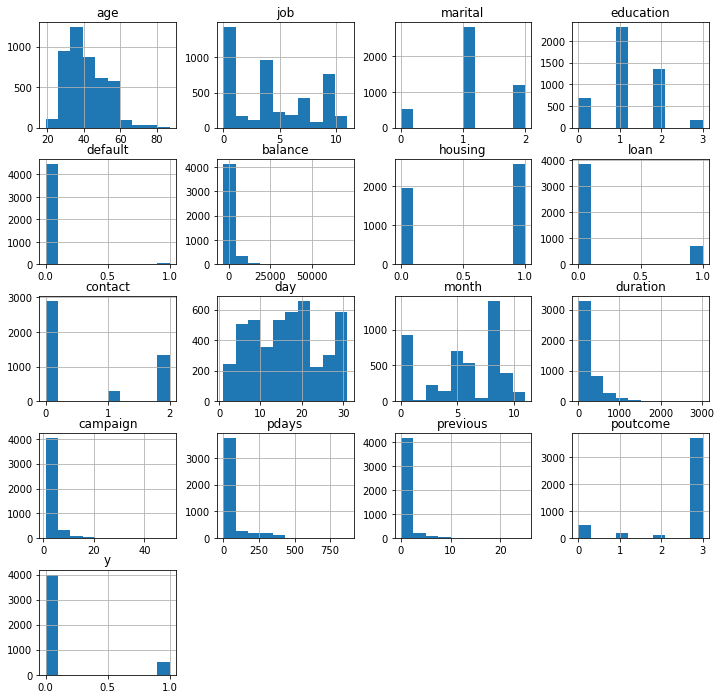

In [209]:
#visualize data
df.hist(figsize=(12,12))
plt.show()

In [ ]:
#display missing val columns (a,b represent index of cols with missing vals shown by df.isna())
df.iloc[:,[a,b]]
#drop missing columns
df=df.dropna()

In [196]:
#normalize data
temp=df
scale=skprep.StandardScaler()
scale.fit(temp)
temp2=scale.transform(temp)
print(temp2)

[[-1.05626965  1.71680374 -0.24642938 ... -0.32041282  0.44441328
  -0.36090165]
 [-0.77258281  0.79524562 -0.24642938 ...  2.04173372 -2.57996071
  -0.36090165]
 [-0.58345826 -0.12631251  1.42139579 ...  0.27012381 -2.57996071
  -0.36090165]
 ...
 [ 1.49691189  1.4096177  -0.24642938 ... -0.32041282  0.44441328
  -0.36090165]
 [-1.24539421 -1.04787063 -0.24642938 ...  1.45119709 -1.57183605
  -0.36090165]
 [ 0.26760226 -0.74068459  1.42139579 ...  3.81334363 -1.57183605
  -0.36090165]]


In [197]:
#sgd model
pipeS=pipe=skpipe.Pipeline([('scaler',skprep.StandardScaler()),
                      ('SGD',sklin.SGDClassifier())])

In [198]:
#random forest model
pipeR=skpipe.Pipeline([('scaler',skprep.StandardScaler()),
                      ('Rft',skens.RandomForestClassifier())])

In [199]:
pipeS.fit(xtrain,ytrain)
pipeR.fit(xtrain,ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Rft', RandomForestClassifier())])

In [200]:
predS=pipeS.predict(xtest)
predR=pipeR.predict(xtest)

In [201]:
#classification report for sgd
print("Classification report for SGD")
print(skmet.classification_report(ytest,predS))

Classification report for SGD
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       803
           1       0.38      0.15      0.21       102

    accuracy                           0.88       905
   macro avg       0.64      0.56      0.57       905
weighted avg       0.84      0.88      0.85       905



In [202]:
#classification report for random forest
print("Classification report for random forest")
print(skmet.classification_report(ytest,predR))

Classification report for random forest
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       803
           1       0.55      0.23      0.32       102

    accuracy                           0.89       905
   macro avg       0.73      0.60      0.63       905
weighted avg       0.87      0.89      0.87       905



In [203]:
#cross validate SGD
scoreS=skms.cross_validate(pipeS,xtrain,ytrain,cv=10)
print("For SGD,")
print(scoreS)

For SGD,
{'fit_time': array([0.01806045, 0.01914144, 0.01518726, 0.01364827, 0.01437068,
       0.01407838, 0.01149797, 0.0130477 , 0.01700974, 0.01196599]), 'score_time': array([0.00251889, 0.00198984, 0.00199604, 0.00192976, 0.00187325,
       0.0018034 , 0.00178099, 0.00167251, 0.00192261, 0.00190043]), 'test_score': array([0.88674033, 0.87016575, 0.88950276, 0.8839779 , 0.87569061,
       0.87845304, 0.88919668, 0.89750693, 0.89473684, 0.86980609])}


In [204]:
#cross validate random forest
scoreR=skms.cross_validate(pipeR,xtrain,ytrain,cv=10)
print("For Random forest")
print(scoreR)

For Random forest
{'fit_time': array([0.64296103, 0.39670086, 0.41512728, 0.3991704 , 0.36781406,
       0.37191677, 0.40076566, 0.36450028, 0.38467073, 0.39650583]), 'score_time': array([0.01494622, 0.01734281, 0.01671624, 0.01569486, 0.01511812,
       0.01524806, 0.0170362 , 0.01641512, 0.01798511, 0.01550722]), 'test_score': array([0.90055249, 0.89226519, 0.8839779 , 0.88950276, 0.91160221,
       0.90055249, 0.89196676, 0.89750693, 0.90027701, 0.88088643])}


confusion matrix for SGD


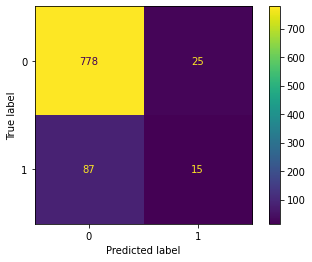

In [205]:
print("confusion matrix for SGD")
fig=skmet.ConfusionMatrixDisplay.from_predictions(ytest,predS)
plt.show()

confusion matrix for random forest


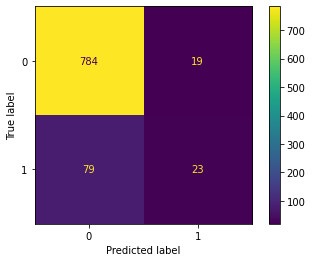

In [206]:
print("confusion matrix for random forest")
fig=skmet.ConfusionMatrixDisplay.from_predictions(ytest,predR)
plt.show()